In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# spliting dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,-1]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#feature engineering
Geography=pd.get_dummies(X['Geography'],drop_first=True)
Gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#concatinating these with dataset
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X=pd.concat([X,Geography,Gender] ,axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
#feature_scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Dropout

In [ ]:
#initializing_ANN
classifier=Sequential()
#adding_input_layer
classifier.add(Dense(units=11,activation='relu',input_shape=(X_train.shape[1],)))
#adding_first_hidden_layer
classifier.add(Dense(units=7,activation='relu'))
#adding_second_hidden_layer
classifier.add(Dense(units=5,activation='relu'))
#adding_output_layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#training_neural_network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=es)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 9.4407 - accuracy: 0.7059 - val_loss: 9.2802 - val_accuracy: 0.7989
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 9.6969 - accuracy: 0.7072 - val_loss: 14.7918 - val_accuracy: 0.5180
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 8.7905 - accuracy: 0.7087 - val_loss: 11.9973 - val_accuracy: 0.6551
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 9.0117 - accuracy: 0.7039 - val_loss: 15.7794 - val_accuracy: 0.5559
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 5.9823 - accuracy: 0.7115 - val_loss: 1.9730 - val_accuracy: 0.7936
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 3.3384 - accuracy: 0.7205 - val_loss: 2.7880 - val_accuracy: 0.8023
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 2.9383 - accuracy: 0.7184 - val_loss: 3.3703 - val_accura

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

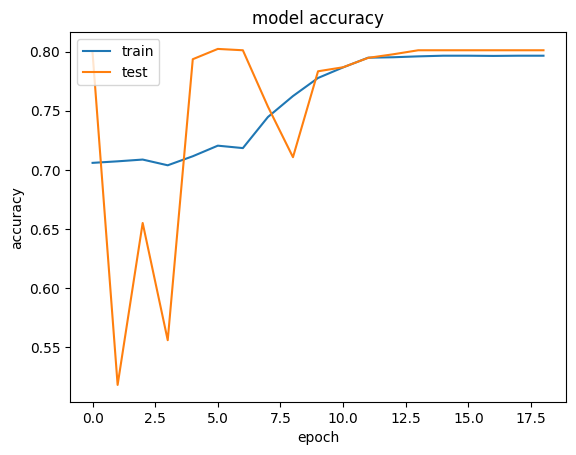

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

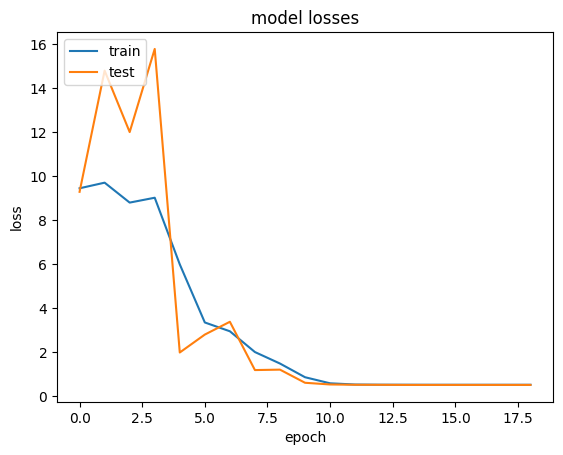

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1578,    0],
       [ 422,    0]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.789

In [ ]:
#getting_weights
classifier.get_weights()

[array([[-2.18352154e-02, -3.08915913e-01,  2.12079212e-02,
          3.07723701e-01, -1.85927972e-01,  4.04796332e-01,
          1.69904709e-01, -1.20420987e-02,  8.73994678e-02,
          4.48693596e-02, -4.09081876e-01],
        [-1.19162214e+00, -8.81908059e-01,  8.77997220e-01,
         -4.30021763e-01, -4.98685569e-01, -4.61157471e-01,
          3.01766992e-01,  1.39800513e+00,  4.19386059e-01,
         -1.08786380e+00,  6.40019238e-01],
        [-2.27540374e-01,  2.23111004e-01,  1.91212922e-01,
          4.83758658e-01, -4.48782653e-01,  1.48726910e-01,
          4.70861703e-01,  2.20431343e-01,  1.13478698e-01,
          2.64799744e-01,  1.59174204e-02],
        [-3.51319462e-02,  2.56258190e-01, -1.29888073e-01,
          4.96077836e-01, -5.54841422e-02, -5.20256579e-01,
          2.52282023e-01,  1.79016709e-01,  4.06001568e-01,
         -9.77683514e-02,  8.11369643e-02],
        [-5.65076470e-01, -5.57157286e-02, -3.36141616e-01,
         -2.89538115e-01, -1.94617510e-02,  